# Question 1
## Data Validation
This data set has 344 entries, 8 columns. I have checked the data types and missing values in the data set. The data types are correct, and there are 11 missing values in the `sex` column, 2 missing values in the `bill_length_mm`, `bill_depth_mm`, `flipper_length_mm`, and `body_mass_g` columns. The missing values can be filled with the mean value of the corresponding column. The data set has no duplicated entries.
Columns:
- species: 3 species without missing values, `Adelie` (152), `Chinstrap` (68), and `Gentoo` (124). No cleaning is needed.
- island: 3 islands without missing values, `Biscoe` (168), `Dream` (124), and `Torgersen` (52). No cleaning is needed.
- bill_length_mm: numeric values (float64) with 2 missing values. Missing values can be filled with the mean value.
- bill_depth_mm: numeric values (float64) with 2 missing values. Missing values can be filled with the mean value.
- flipper_length_mm: numeric values (float64) with 2 missing values. Missing values can be filled with the mean value.
- body_mass_g: numeric values (float64) with 2 missing values. Missing values can be filled with the mean
- sex: 2 sexes with 11 missing values, `male` (168) and `female` (165). Missing values can be filled with the mode value.
- year: 3 years without missing values, `2009` (120), `2008` (114), `2007` (110). No cleaning is needed.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns
from imblearn.over_sampling import SMOTE
from palmerpenguins import load_penguins
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

plt.style.use('ggplot')
# plt.style.use('fivethirtyeight')
# plt.style.use('seaborn-v0_8-paper')

In [3]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [4]:
penguins = load_penguins()
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [5]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [6]:
penguins['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [7]:
penguins['island'].value_counts()

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

In [8]:
penguins['bill_length_mm'].describe().T

count    342.000000
mean      43.921930
std        5.459584
min       32.100000
25%       39.225000
50%       44.450000
75%       48.500000
max       59.600000
Name: bill_length_mm, dtype: float64

In [9]:
penguins['bill_depth_mm'].describe().T

count    342.000000
mean      17.151170
std        1.974793
min       13.100000
25%       15.600000
50%       17.300000
75%       18.700000
max       21.500000
Name: bill_depth_mm, dtype: float64

In [10]:
penguins['flipper_length_mm'].describe().T

count    342.000000
mean     200.915205
std       14.061714
min      172.000000
25%      190.000000
50%      197.000000
75%      213.000000
max      231.000000
Name: flipper_length_mm, dtype: float64

In [11]:
penguins['body_mass_g'].apply(lambda x: x/1000).describe()

count    342.000000
mean       4.201754
std        0.801955
min        2.700000
25%        3.550000
50%        4.050000
75%        4.750000
max        6.300000
Name: body_mass_g, dtype: float64

In [12]:
penguins['sex'].value_counts()

sex
male      168
female    165
Name: count, dtype: int64

In [13]:
penguins['year'].value_counts()

year
2009    120
2008    114
2007    110
Name: count, dtype: int64

In [14]:
penguins.describe().T

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,342.0,43.921930,5.459584,32.1,39.225,44.45,48.5,59.6
bill_depth_mm,342.0,17.151170,1.974793,13.1,15.600,17.30,18.7,21.5
flipper_length_mm,342.0,200.915205,14.061714,172.0,190.000,197.00,213.0,231.0
body_mass_g,342.0,4201.754386,801.954536,2700.0,3550.000,4050.00,4750.0,6300.0
year,344.0,2008.029070,0.818356,2007.0,2007.000,2008.00,2009.0,2009.0


## Data Cleaning
After inspecting the data, I decided to apply the following cleaning steps:
- Drop missing values in the `bill_length_mm`, `bill_depth_mm`, `flipper_length_mm`, and `body_mass_g` columns.
- Fill missing values in the `sex` column with random values weighted by the ratio of each category.
- Convert the dtypes to the correct ones.
    - `species`, `island`, `year`, and `sex` columns to category dtype.
    - `bill_length_mm` and `bill_depth_mm` columns to float64 dtype.
    - `flipper_length_mm`, `body_mass_g` columns to int64 dtype.

In [15]:
# Set the seed for reproducibility
random.seed(42)

# Count the number of missing values in the sex column
missing_count = penguins['sex'].isnull().sum()

# Count the number of males and females in the existing data
male_ratio = penguins['sex'].value_counts(normalize=True)['male']
female_ratio = penguins['sex'].value_counts(normalize=True)['female']

display(penguins['sex'].value_counts(normalize=True))

# Generate random values based on the ratio
random_values = random.choices(['male', 'female'], weights=[male_ratio, female_ratio], k=missing_count)

# Assign the random values to the missing values in the sex column
penguins.loc[penguins['sex'].isnull(), 'sex'] = random_values

penguins['sex'].value_counts(normalize=True)

sex
male      0.504505
female    0.495495
Name: proportion, dtype: float64

sex
male      0.508721
female    0.491279
Name: proportion, dtype: float64

In [16]:
penguins.dropna(subset='bill_length_mm', inplace=True)

In [17]:
# missing_columns = penguins.columns[penguins.isnull().any()]

# for column in missing_columns:
#     penguins.fillna({column: penguins[column].mean()}, inplace=True)

In [18]:
for column in penguins.columns:
    if penguins[column].dtype == 'object':
        penguins[column] = penguins[column].astype('category')
    elif penguins[column].dtype == 'float':
        if penguins[column].apply(float.is_integer).all():
            print(f'{column} is a float column with all integer values')
            penguins[column] = penguins[column].astype('int64')
    else:
        penguins[column] = penguins[column].astype('category')
            
penguins.info()

flipper_length_mm is a float column with all integer values
body_mass_g is a float column with all integer values
<class 'pandas.core.frame.DataFrame'>
Index: 342 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            342 non-null    category
 1   island             342 non-null    category
 2   bill_length_mm     342 non-null    float64 
 3   bill_depth_mm      342 non-null    float64 
 4   flipper_length_mm  342 non-null    int64   
 5   body_mass_g        342 non-null    int64   
 6   sex                342 non-null    category
 7   year               342 non-null    category
dtypes: category(4), float64(2), int64(2)
memory usage: 15.2 KB


## Exploratory Analysis
I have investigated the data set by visualizing the distributions of the features and the relationships between the features. After the analysis, I decided to apply the following changes to enable modeling:


### Target variable - `species`
Since we need to predict the species of the penguins, the `species` column is the target variable. From the bar chart below, class imbalance is observed in the target variable. The `Adelie` species has the most samples, followed by the `Gentoo` species, and the `Chinstrap` species has the least samples. I will use the SMOTE technique to balance the classes for the classification models.

C:\Users\kisee\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\kisee\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\kisee\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

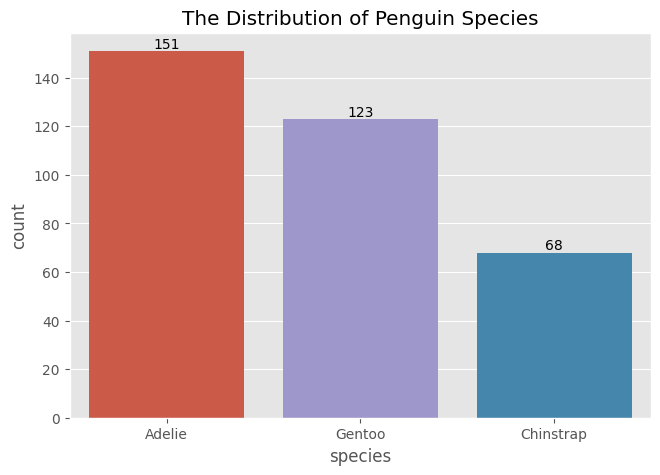

In [19]:
fig, ax = plt.subplots(1,1, figsize=(7.5,5))
sns.countplot(data=penguins, x='species', hue='species', order=['Adelie', 'Gentoo', 'Chinstrap']).set(title='The Distribution of Penguin Species')
for p in ax.patches:
        if p.get_height() > 0:
            ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

In [20]:
def plot_cdistribution(data, column, by='species', color='gray'):
    
    col = column.title()

    fig, ax = plt.subplots(1,2, figsize=(10,5), sharey=True)
    # Plot the counts of each category in the column in descending order
    sns.countplot(data=data, x=column, color=color, ax=ax[0])

    for p in ax[0].patches:
        if p.get_height() > 0:
            ax[0].annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

    sns.countplot(data=data, x=column, hue=by, ax=ax[1])

    for p in ax[1].patches:
        if p.get_height() > 0:
            ax[1].annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

    ax[0].set_xlabel(col)
    ax[1].set_xlabel(col)
    
    ax[0].set_ylabel('Count')
    # ax[1].set_ylabel('Count')

    if col.endswith('x'):
        plural = col + 'es'
    else:
        plural = col + 's'

    fig.suptitle(f'The Distribution of {plural} | Across Species', fontsize=20)

    plt.show()

In [21]:
def plot_distribution(data, column, by='species', histyle='dodge', color=None,
                      violin=False, kde=True, log=False):
    
    col = column.rsplit('_', 1)[0].replace('_', ' ').title()
    if len(column.rsplit('_', 1)) > 1:
        units = column.rsplit('_', 1)[-1]
    else:
        units = ''
    
    fig, ax = plt.subplots(2,2, figsize=(10,6), sharex=True,
                           gridspec_kw={'height_ratios': [5, 1],
                                        'hspace': 0.025})
    sns.histplot(data=data, x=column, color='gray', kde=kde, log_scale=log, ax=ax[0,0])
    if violin:
        sns.violinplot(data=data, x=column, color='gray', log_scale=log, ax=ax[1,0])
    else:
        sns.boxplot(data=data, x=column, color='gray', log_scale=log, ax=ax[1,0])

    sns.histplot(data=data, x=column, palette=color, hue=by, kde=kde, log_scale=log, multiple=histyle, ax=ax[0,1])
    if violin:
        sns.violinplot(data=data, x=column, palette=color, y=by, hue=by, log_scale=log, ax=ax[1,1])
    else:
        sns.boxplot(data=data, x=column, palette=color, y=by, hue=by, log_scale=log, ax=ax[1,1])

    xlabel = f'{col} ({units})'

    ax[1,0].set_xlabel(xlabel)
    ax[1,1].set_xlabel(xlabel)

    ax[0,1].set_ylabel('')
    ax[1,1].set_ylabel('')

    # ax[0,1].set_yticklabels('')
    # ax[1,1].set_yticklabels('')
    
    # ax[0,0].set_xticks([])
    # ax[0,1].set_xticks([])

    ax[1,0].set_yticks([])
    # ax[0,1].set_yticks([])
    ax[1,1].set_yticks([])

    fig.suptitle(f'The Distribution of {col} | Across Species', fontsize=20)

    plt.show()

### Categorical Variables - `island`, `sex`, `year`
- The `island` column has three categories, `Biscoe`, `Dream`, and `Torgersen`. The `Biscoe` island has the most samples (167), followed by the `Dream` island (124), and the `Torgersen` island has the least samples (51). The `Adelie` species is observed in all three islands, the `Gentoo` species is observed in the `Biscoe` island, and the `Chinstrap` species is observed in the `Dream` island.
- The `sex` column has two categories. `female` and `male`. The `male` category has more samples (174) than the `female` category (168). The species are more or less equally distributed across the sexes.
- The `year` column has three categories, `2007`, `2008`, and `2009`. The `2009` year has the most samples (120), followed by the `2008` year (114), and the `2007` year has the least samples (110). Again, the numbers are more or less equally distributed across the species.


C:\Users\kisee\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\kisee\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\kisee\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

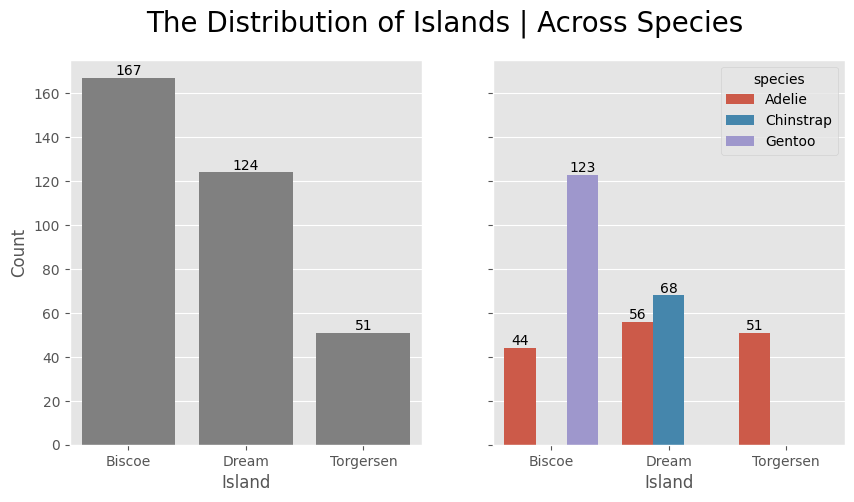

In [22]:
plot_cdistribution(penguins, 'island')

C:\Users\kisee\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\kisee\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\kisee\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

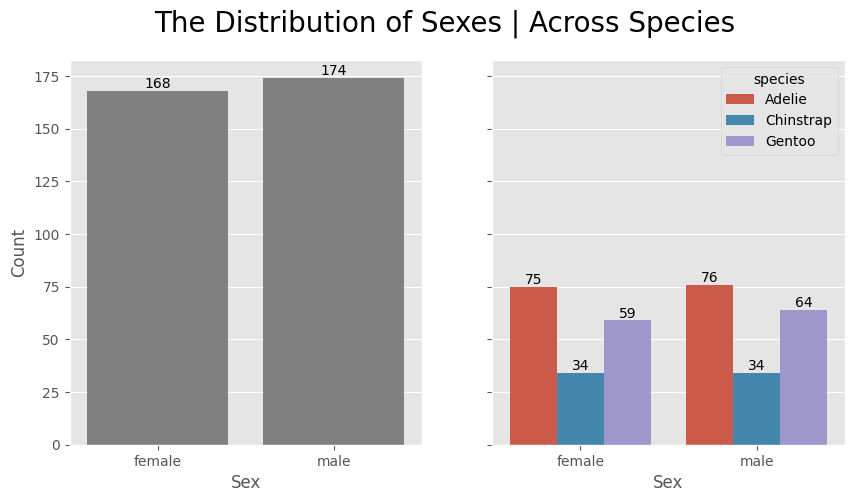

In [23]:
plot_cdistribution(penguins, 'sex')

C:\Users\kisee\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\kisee\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\kisee\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

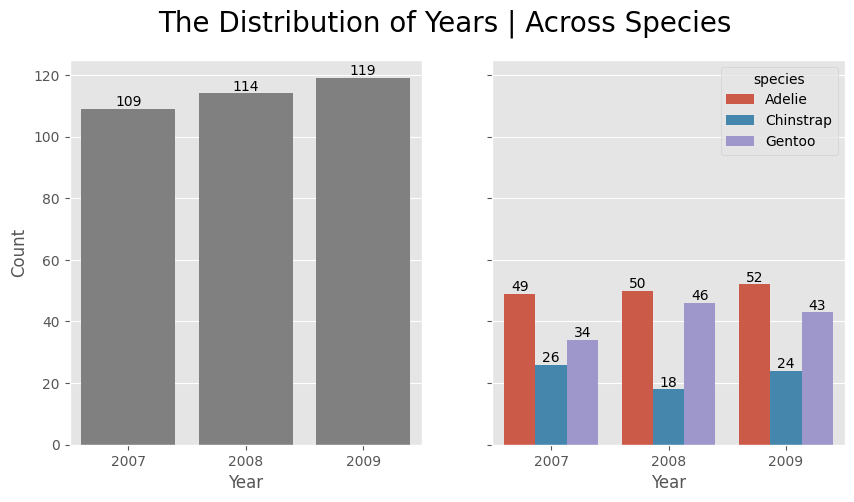

In [24]:
plot_cdistribution(penguins, 'year')

### Numeric Variables - `bill_length_mm`, `bill_depth_mm`, `flipper_length_mm`, `body_mass_g`

#### Univariate Analysis
- The bill_length_mm column has a normal distribution. The `Adelie` species has the smallest bill length, followed by the `Gentoo` species, and the `Chinstrap` species has the longest bill length. It is worth mentioning that `Chinstrap` and `Gentoo` species have almost similar bill lengths.
- The bill_depth_mm column has a normal distribution. The `Gentoo` species has the smallest bill depth, followed by the `Adelie` species, and the `Chinstrap` species has the largest bill depth, marginally. `Adelie` and `Chinstrap` have almost similar bill depths though 'Adelie' has a wider range.
- The flipper_length_mm column has a normal distribution. The `Adelie` species has the shortest flipper length, followed by the `Chinstrap` species, and the `Gentoo` species has the longest flipper length. The `Adelie` and `Chinstrap` species have almost similar flipper lengths.
- The `body_mass_g` column has a normal distribution. The `Adelie` species has the lightest body mass, followed by the `Chinstrap` species, and the `Gentoo` species has the heaviest body mass. The `Adelie` and `Chinstrap` species have almost similar body masses. The `Gentoo` species has a wider range of body masses.

C:\Users\kisee\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\kisee\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\kisee\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\kisee\AppData\Local\Programs\Python\Python311

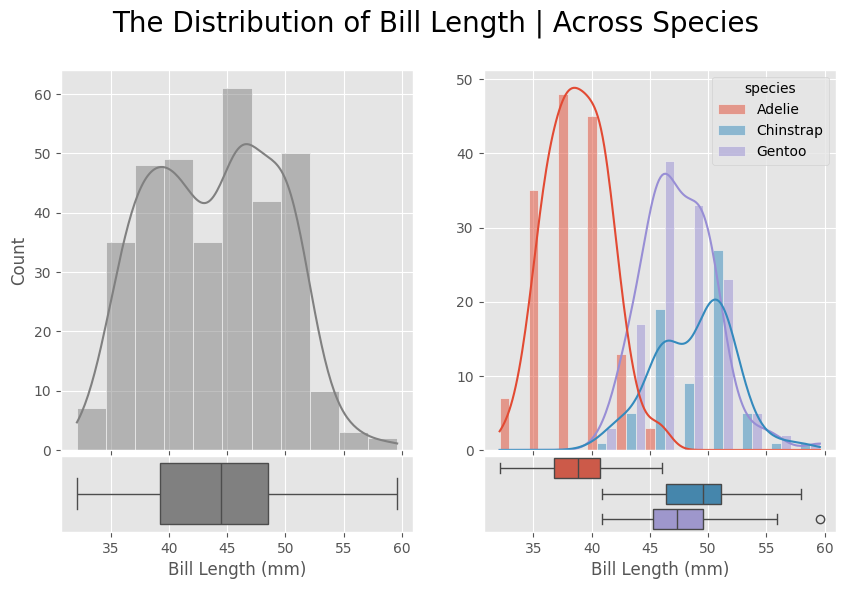

In [25]:
plot_distribution(penguins, 'bill_length_mm')

C:\Users\kisee\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\kisee\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\kisee\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\kisee\AppData\Local\Programs\Python\Python311

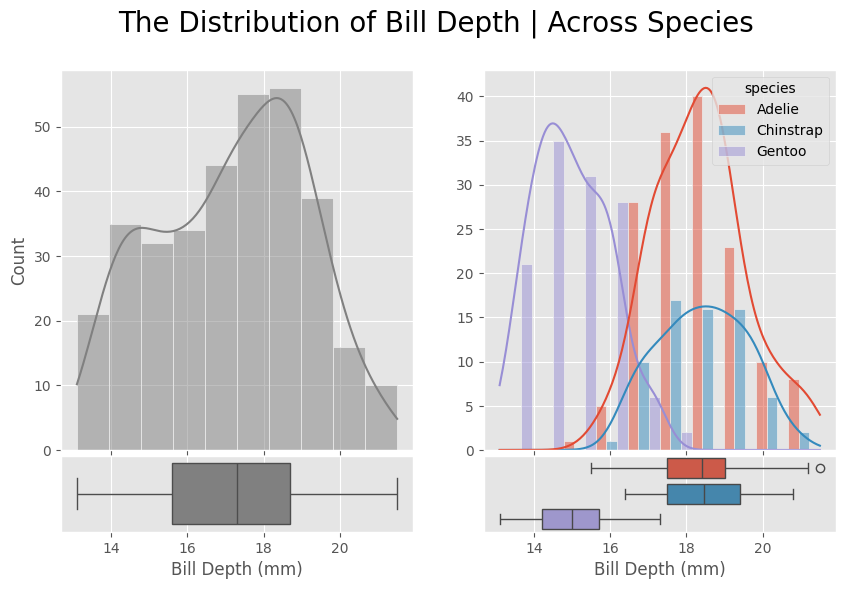

In [26]:
plot_distribution(penguins, 'bill_depth_mm')

C:\Users\kisee\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\kisee\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\kisee\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\kisee\AppData\Local\Programs\Python\Python311

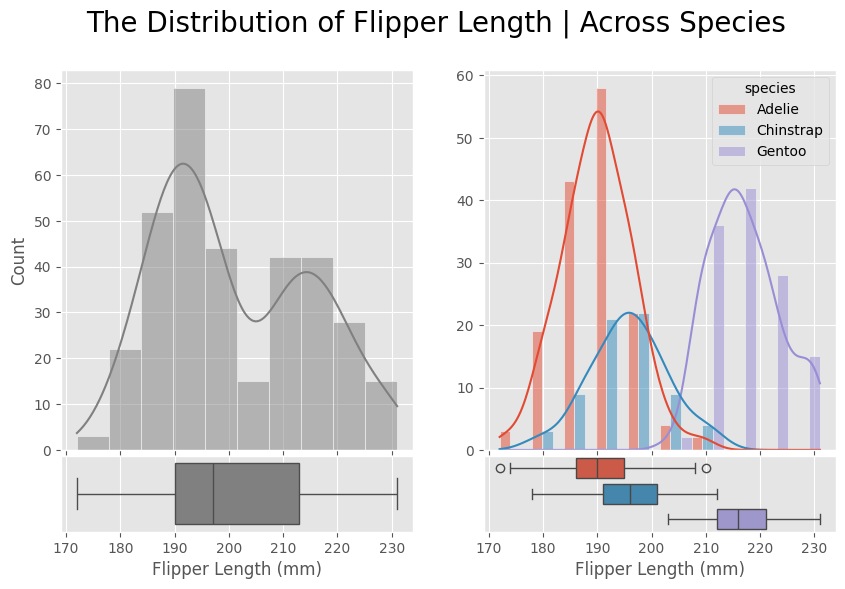

In [27]:
plot_distribution(penguins, 'flipper_length_mm')

C:\Users\kisee\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\kisee\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\kisee\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\kisee\AppData\Local\Programs\Python\Python311

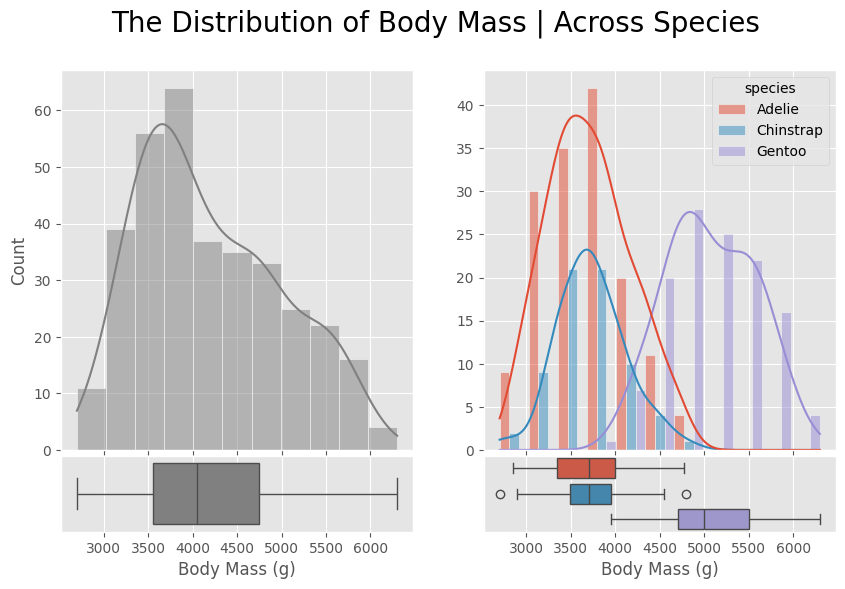

In [28]:
plot_distribution(penguins, 'body_mass_g')

#### Relationships between numeric variables across species
I have examined the relationships between the numeric variables across species. The following relationships are observed:

##### Species-specific traits
1. `Adelie` Penguins
- **Bill Length & Bill Depth:** Positive correlation (( r = 0.33 )), suggesting a moderate relationship where longer bills tend to be deeper.
- **Bill Length & Flipper Length:** Positive correlation (( r = 0.33 )), indicating that longer bills are moderately associated with longer flippers.
- **Bill Length & Body Mass:** Strong positive correlation (( r = 0.55 )), showing that penguins with longer bills tend to have higher body mass.
- **Bill Depth & Flipper Length:** Positive correlation (( r = 0.31 )), suggesting a moderate association.
- **Bill Depth & Body Mass:** Strong positive correlation (( r = 0.58 )), indicating deeper bills are associated with higher body mass.
- **Flipper Length & Body Mass:** Moderate positive correlation (( r = 0.47 )), suggesting that longer flippers are moderately associated with higher body mass.
2. `Gentoo` Penguins
- **Bill Length & Flipper Length:** Strong positive correlation (( r = 0.66 )), indicating that bill length increases with flipper length.
- **Bill Length & Body Mass:** Moderate positive correlation (( r = 0.67 )), suggesting that heavier Gentoos tend to have longer bills.
- **Bill Depth & Flipper Length:** Strong positive correlation (( r = 0.71 )), indicating a strong association.
- **Bill Depth & Body Mass:** Strong positive correlation (( r = 0.72 )), suggesting deeper bills are associated with higher body mass.
- **Flipper Length & Body Mass:** Perfect correlation (( r = 1 )), indicating that flipper length is an excellent predictor of body mass in Gentoos.
3. `Chinstrap` Penguins
- **Bill Length & Bill Depth:** Moderate positive correlation (( r = 0.65 )), suggesting a relationship between bill length and depth.
- **Bill Length & Flipper Length:** Moderate positive correlation (( r = 0.47 )).
- **Bill Length & Body Mass:** Moderate positive correlation (( r = 0.53 )), indicating that longer bills are moderately associated with higher body mass.
- **Bill Depth & Flipper Length:** Perfect positive correlation (( r = 1 )), suggesting that bill depth is an excellent predictor of flipper length.
- **Bill Depth & Body Mass:** Perfect positive correlation (( r = 1 )), indicating that bill depth is an excellent predictor of body mass.
- **Flipper Length & Body Mass:** Moderate positive correlation (( r = 0.64 )).
##### All Species Combined
- **Bill Length & Bill Depth:** Negative correlation (( r = -0.24 )), indicating that as bill length increases, bill depth decreases.
- **Bill Length & Flipper Length:** Strong positive correlation (( r = 0.66 )), suggesting that longer bills are associated with longer flippers.
- **Bill Length & Body Mass:** Strong positive correlation (( r = 0.66 )), indicating that longer bills are associated with higher body mass.
- **Bill Depth & Flipper Length:** Negative correlation (( r = -0.58 )), suggesting that deeper bills are associated with shorter flippers.
- **Bill Depth & Body Mass:** Negative correlation (( r = -0.47 )), indicating that deeper bills are associated with lower body mass.
- **Flipper Length & Body Mass:** Strong positive correlation (( r = 0.87 )), suggesting that longer flippers are strongly associated with higher body mass.


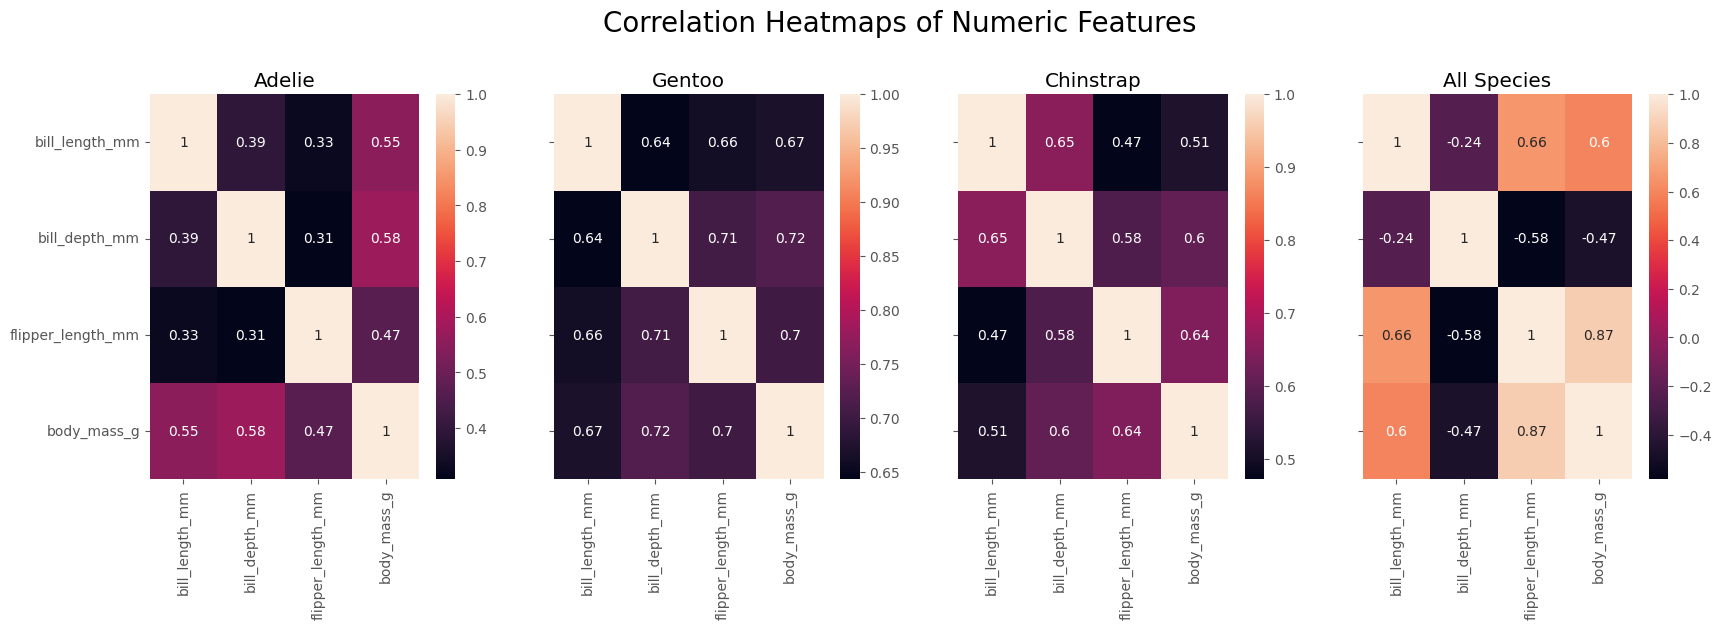

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,0.391492,0.325785,0.548866
bill_depth_mm,0.391492,1.000000,0.307620,0.576138
flipper_length_mm,0.325785,0.307620,1.000000,0.468202
body_mass_g,0.548866,0.576138,0.468202,1.000000


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,0.643384,0.661162,0.669166
bill_depth_mm,0.643384,1.000000,0.706563,0.719085
flipper_length_mm,0.661162,0.706563,1.000000,0.702667
body_mass_g,0.669166,0.719085,0.702667,1.000000


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,0.653536,0.471607,0.513638
bill_depth_mm,0.653536,1.000000,0.580143,0.604498
flipper_length_mm,0.471607,0.580143,1.000000,0.641559
body_mass_g,0.513638,0.604498,0.641559,1.000000


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


In [29]:
numeric = penguins[penguins.select_dtypes(include='number').columns]

numeric_species1 = penguins[penguins['species'] == 'Adelie'].select_dtypes(include='number')
numeric_species2 = penguins[penguins['species'] == 'Gentoo'].select_dtypes(include='number')
numeric_species3 = penguins[penguins['species'] == 'Chinstrap'].select_dtypes(include='number')

fig, ax = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
sns.heatmap(numeric_species1.corr(), annot=True, cbar=True, ax=ax[0])
ax[0].set_title('Adelie')
sns.heatmap(numeric_species2.corr(), annot=True, cbar=True, ax=ax[1])
ax[1].set_title('Gentoo')
sns.heatmap(numeric_species3.corr(), annot=True, cbar=True, ax=ax[2])
ax[2].set_title('Chinstrap')
sns.heatmap(numeric.corr(), annot=True, cbar=True, ax=ax[3])
ax[3].set_title('All Species')

plt.suptitle('Correlation Heatmaps of Numeric Features', fontsize=20, y=1.05)

plt.show();

display(numeric_species1.corr())
display(numeric_species2.corr())
display(numeric_species3.corr())
display(numeric.corr())

C:\Users\kisee\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\kisee\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\kisee\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

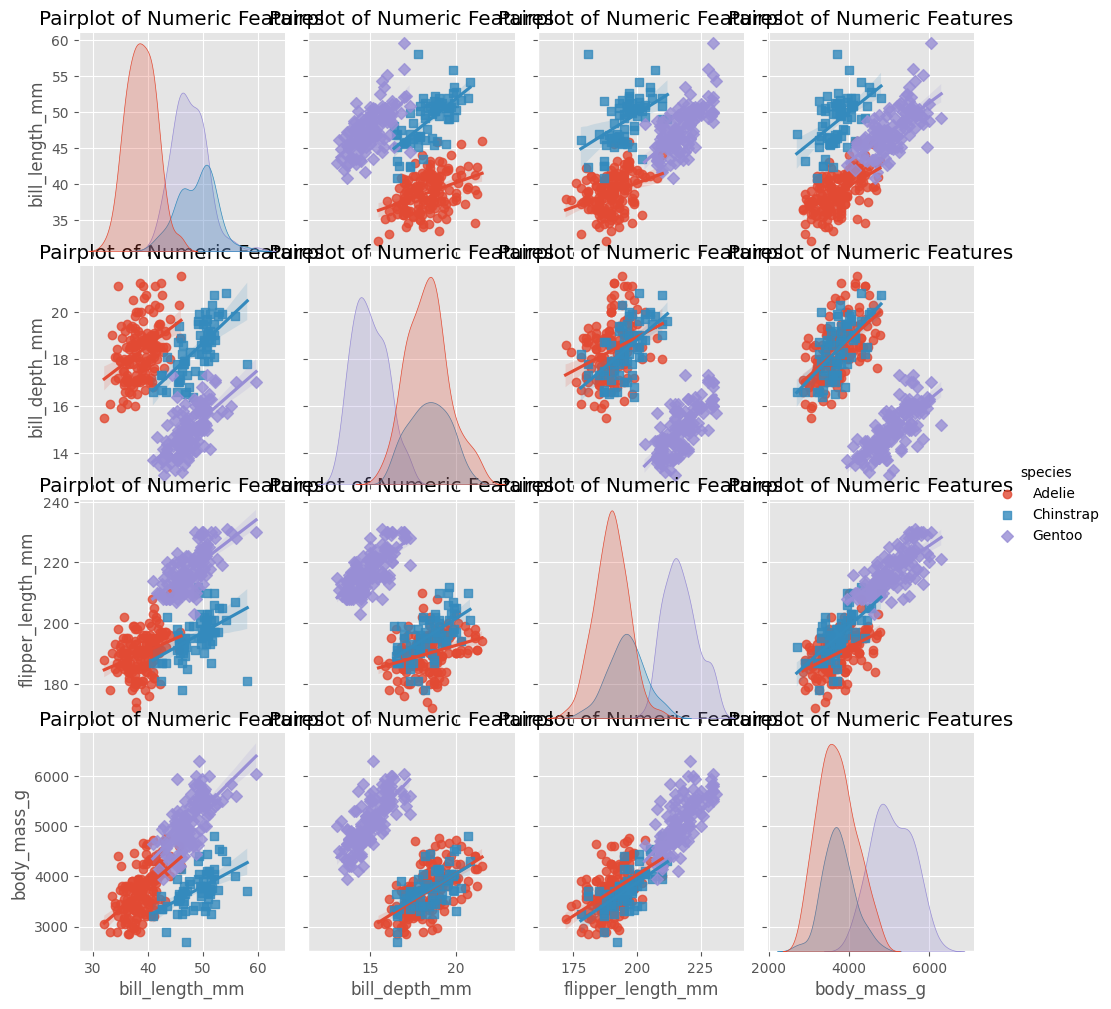

In [30]:
sns.pairplot(penguins, kind='reg', hue='species', markers=['o', 's', 'D']).set(title='Pairplot of Numeric Features');

In [31]:
# sns.jointplot(data=penguins, x='bill_length_mm', y='bill_depth_mm', hue='species', kind='kde', fill=True);
# sns.jointplot(data=penguins, x='bill_length_mm', y='flipper_length_mm', hue='species', kind='kde', fill=True);
# sns.jointplot(data=penguins, x='bill_length_mm', y='body_mass_g', hue='species', kind='kde', fill=True);
# sns.jointplot(data=penguins, x='bill_depth_mm', y='flipper_length_mm', hue='species', kind='kde', fill=True);
# sns.jointplot(data=penguins, x='bill_depth_mm', y='body_mass_g', hue='species', kind='kde', fill=True);
# sns.jointplot(data=penguins, x='flipper_length_mm', y='body_mass_g', hue='species', kind='kde', fill=True);

## Model Fitting & Evaluation
Predicting the species is a classification problem in machine learning. I am taking two approaches:
1. Clustering - This is an unsupervised learning technique where the model groups similar data points together. I will use the KMeans algorithm to cluster the penguins based on their features.
2. Classification - This is a supervised learning technique where the model learns from the data and predicts the target variable. I will use the following classification algorithms:
    - Decision Tree:
        - The Decision Tree model is a simple model that is easy to interpret. It is a white-box model that can be visualized. It is also robust to outliers.
    - Support Vector Machine:
        - The Support Vector Machine model is a powerful model that can handle non-linear data. It is also robust to overfitting. To interpret the model and understand the importance of each feature, I will use the coefficients of the features. I will also use the support vectors to understand the effect of each feature on the decision boundary.
    - Logistic Regression:
        - The Logistic Regression model is a simple model that is easy to interpret. It is also robust to overfitting. To interpret the model, I will use the coefficients of the features to understand the importance of each feature in predicting the target variable. I will also use the odds ratio to understand the effect of each feature on the odds of predicting the target variable.

Using `GridSearchCV`, I will tune the hyperparameters of the models to improve their performance.

I will evaluate the models using the following metrics:
- Confusion Matrix: A table that shows the number of true positives, false positives, true negatives, and false negatives. It is a good metric to understand the performance of the model.
- Accuracy: The proportion of correctly classified instances. It is a good metric when the classes are balanced.
- Precision: The proportion of correctly classified instances among the predicted positive instances. It is a good metric when the cost of false positives is high.
- Recall: The proportion of correctly classified instances among the actual positive instances. It is a good metric when the cost of false negatives is high.


### Prepare Data for Modelling
To enable modelling, I have applied the following changes to the data set:
- Filled missing values in the `sex` column with random values weighted by the ratio of each category.
- Dropped missing values in the `bill_length_mm`, `bill_depth_mm`, `flipper_length_mm`, and `body_mass_g` columns
- Converted the categorical variables into numeric features
- Scaled the numeric features
- Split the data into a training set and a test set
- Balanced the classes in the `species` column using the SMOTE technique. This was only performed on the training set to maintain the integrity of the test set.
-

In [32]:
model_data = penguins.copy()

y = model_data.pop('species')
X = model_data

In [33]:
labelencoder = LabelEncoder()

X['island'] = labelencoder.fit_transform(X['island'])
X['sex'] = labelencoder.fit_transform(X['sex'])

In [34]:
pd.DataFrame(X).describe().T

,count,mean,std,min,25%,50%,75%,max
island,342.0,0.660819,0.723820,0.0,0.000,1.00,1.0,2.0
bill_length_mm,342.0,43.921930,5.459584,32.1,39.225,44.45,48.5,59.6
bill_depth_mm,342.0,17.151170,1.974793,13.1,15.600,17.30,18.7,21.5
flipper_length_mm,342.0,200.915205,14.061714,172.0,190.000,197.00,213.0,231.0
body_mass_g,342.0,4201.754386,801.954536,2700.0,3550.000,4050.00,4750.0,6300.0
sex,342.0,0.508772,0.500656,0.0,0.000,1.00,1.0,1.0


In [35]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [36]:
pd.DataFrame(X).describe().T

,count,mean,std,min,25%,50%,75%,max
0,342.0,-8.310441e-17,1.001465,-0.914298,-0.914298,0.469286,0.469286,1.852870
1,342.0,1.662088e-16,1.001465,-2.168526,-0.861570,0.096865,0.839767,2.875868
2,342.0,4.155221e-16,1.001465,-2.054446,-0.786635,0.075475,0.785449,2.205397
3,342.0,-8.310441e-16,1.001465,-2.059320,-0.777373,-0.278838,0.860670,2.142618
4,342.0,8.310441e-17,1.001465,-1.875362,-0.813898,-0.189508,0.684638,2.620248
5,342.0,-5.583578e-17,1.001465,-1.017700,-1.017700,0.982607,0.982607,0.982607
6,342.0,-3.583878e-14,1.001465,-1.261365,-1.261365,-0.035834,1.189697,1.189697


In [37]:
kmeans = KMeans(random_state=42)

params = {'n_clusters': [3],
            'init': ['k-means++', 'random'],
            'n_init': [10, 20, 30, 40, 50],
            'max_iter': [100, 200, 300, 400, 500],
            'tol': [1e-4, 1e-3, 1e-2, 1e-1]}

kmeans = GridSearchCV(kmeans, params, cv=5, n_jobs=-1)

kmeans.fit(X)

GridSearchCV(cv=5, estimator=KMeans(random_state=42), n_jobs=-1,
             param_grid={'init': ['k-means++', 'random'],
                         'max_iter': [100, 200, 300, 400, 500],
                         'n_clusters': [3], 'n_init': [10, 20, 30, 40, 50],
                         'tol': [0.0001, 0.001, 0.01, 0.1]})

In [38]:
clustered_df = model_data.copy()

clustered_df['cluster'] = kmeans.predict(X)
clustered_df['species'] = y

# labels = {'Adelie':2, 'Gentoo': 1, 'Chinstrap': 0}
labels = {'Adelie':0, 'Gentoo': 1, 'Chinstrap': 2}

labels = {v:k for k,v in labels.items()}

clustered_df.replace(labels, inplace=True)

species, clusters = clustered_df['species'], clustered_df['cluster']

accuracy = accuracy_score(species, clusters)
precision = precision_score(species, clusters, average='weighted')
recall = recall_score(species, clusters, average='weighted')
confusion = confusion_matrix(species, clusters)
print(f'Best Hyperparameters: {kmeans.best_params_}\n')
print(f'Metrics\n{"-"*len("Metrics")}')
print(f'Accuracy: {accuracy:.2f}\nPrecision: {precision:.2f}\nRecall: {recall:.2f}\n\nConfusion Matrix:\n{confusion}\n')

Best Hyperparameters: {'init': 'random', 'max_iter': 100, 'n_clusters': 3, 'n_init': 10, 'tol': 0.1}

Metrics
-------
Accuracy: 0.68
Precision: 0.72
Recall: 0.68

Confusion Matrix:
[[ 75  76   0]
 [ 34  34   0]
 [  0   0 123]]



In [39]:
clustered_df[['cluster', 'species']] = clustered_df[['cluster', 'species']].astype('category')

In [40]:
def scatter(data, x, y):
    fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
    
    sns.scatterplot(data=data, x=x, y=y, hue='species', style='species', s=100, alpha=0.75, ax=ax[0])
    sns.scatterplot(data=data, x=x, y=y, hue='cluster', style='cluster', s=100, alpha=0.75, ax=ax[1])
    
    # ax[0].set_title(f'{x} vs {y} Across Species')
    # ax[1].set_title(f'{x} vs {y} Across Clusters')

    plt.show()

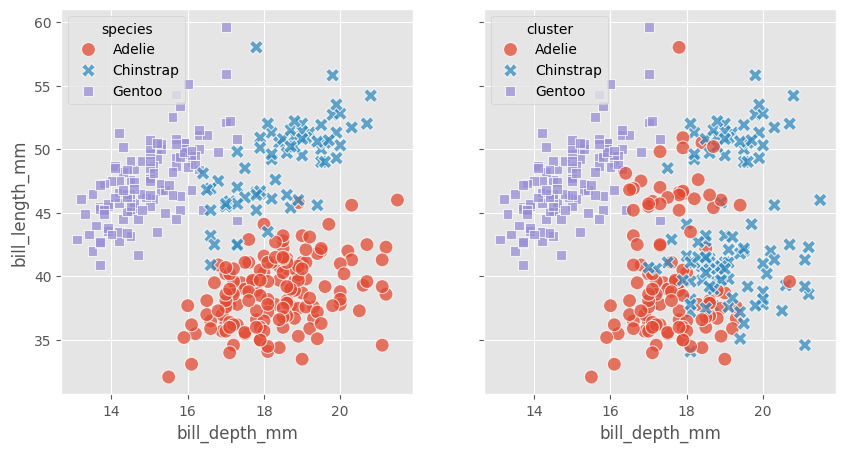

In [41]:

scatter(clustered_df, 'bill_depth_mm', 'bill_length_mm')


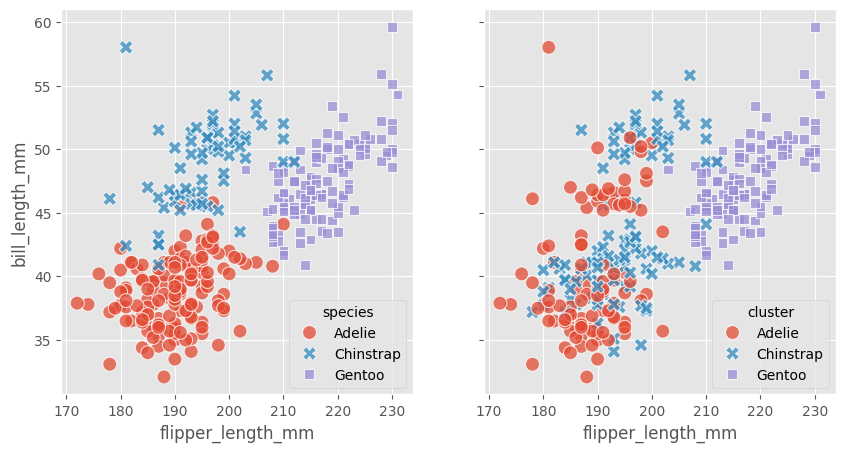

In [42]:
scatter(clustered_df, 'flipper_length_mm', 'bill_length_mm')

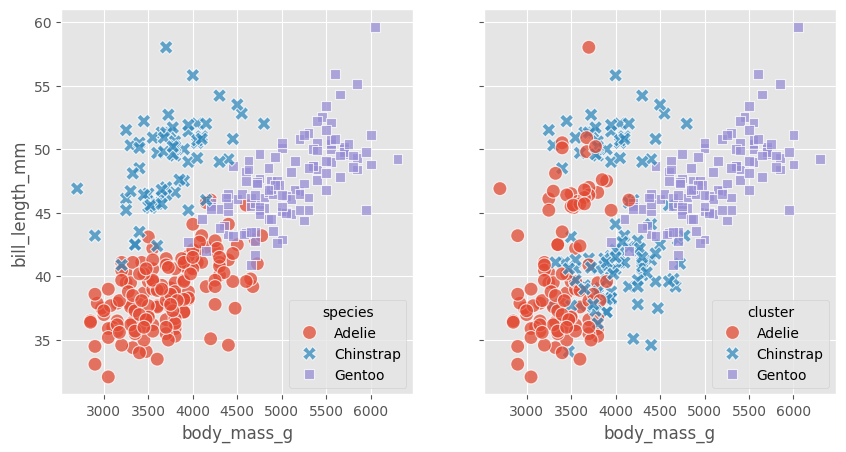

In [43]:
scatter(clustered_df, 'body_mass_g', 'bill_length_mm')

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE()

X_train, y_train = smote.fit_resample(X_train, y_train)

models = {'Logistic Regression': LogisticRegression(random_state=42),
            'Support Vector Machine': SVC(random_state=42),
            'Decision Tree': DecisionTreeClassifier(random_state=42)}

for name, model in models.items():
    print(f'Training {name}...')
    if name == 'Logistic Regression':
        param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
        grid = GridSearchCV(model, param_grid, cv=5)
    elif name == 'Support Vector Machine':
        param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}
        grid = GridSearchCV(model, param_grid, cv=5)
    elif name == 'Decision Tree':
        param_grid = {'max_depth': np.arange(1, 21)}
        grid = GridSearchCV(model, param_grid, cv=5)
    grid.fit(X_train, y_train)
    model = grid.best_estimator_
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    confusion = confusion_matrix(y_test, y_pred)
    print(f'Best Hyperparameters: {grid.best_params_}\n')
    print(f'Metrics\n{"-"*len("Metrics")}')
    print(f'Accuracy: {accuracy:.2f}\nPrecision: {precision:.2f}\nRecall: {recall:.2f}\n\nConfusion Matrix:\n{confusion}\n')

Training Logistic Regression...
Best Hyperparameters: {'C': 10}

Metrics
-------
Accuracy: 1.00
Precision: 1.00
Recall: 1.00

Confusion Matrix:
[[35  0  0]
 [ 0 11  0]
 [ 0  0 23]]

Training Support Vector Machine...
Best Hyperparameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

Metrics
-------
Accuracy: 1.00
Precision: 1.00
Recall: 1.00

Confusion Matrix:
[[35  0  0]
 [ 0 11  0]
 [ 0  0 23]]

Training Decision Tree...
Best Hyperparameters: {'max_depth': 4}

Metrics
-------
Accuracy: 0.97
Precision: 0.97
Recall: 0.97

Confusion Matrix:
[[33  1  1]
 [ 0 11  0]
 [ 0  0 23]]



In [45]:
# Use cross_val_score to evaluate the models
# Print the mean accuracy and standard deviation of the accuracy
# for name, model in models.items():
#     scores = cross_val_score(model, X_train, y_train, cv=5)
#     print(f'{name} - Mean Accuracy: {scores.mean():.2f}, Standard Deviation: {scores.std():.2f}')